## Método $Runge$ $Kutta$ $de$ $4to$ $Orden$
### El método $RK4$ se utiliza para encontar una aproximación a la solución de $ED$ $ordinarias$ $de$ $1^{er}$ $orden$ en un intervalo determinado, del cual se conocen sus condiciones iniciales (problema del valor inicial):
### $\dfrac{dy}{dx} = f(x_{i},\:y_{i})$ donde se conoce la condición inicial $f(x_0) = y_0$ 

### La ecuación que describe el método $RK4$ es la siguiente:
### $1.- \:$ $y_{n+1} = y_{n} + \frac{h}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4})$
### Donde $y_{n+1}$ es el valor anterior de la función evaluada $f(x,\:y)$,  la variable $h$ corresponde al paso o saltos en lo que encontrará solución a la EDO en el intervalo determinado de $f(x_0) = y_0$ hasta $x_f$. Las variables $k_1$, $k_2$, $k_3$ y $k_4$ se describen a continuación:
### $2.- \:$ $k_1 = f(x_{n}, y_{n})$
### $3.- \:$ $k_2 = f(x_{n} + \frac{h}{2}, \:y_{n} + \frac{h}{2}k_{1})$
### $4.- \:$ $k_3 = f(x_{n} + \frac{h}{2}, \:y_{n} + \frac{h}{2}k_{2})$
### $5.- \:$ $k_1 = f(x_{n} + h, y_{n} + hk_{3})$
### Este método funciona de forma $iterativa$ con los valores $y$ anteriores calculados, partiendo de las condiciones iniciales  $f(x_0) = y_0$ 

## Ejemplo
### Encontrar la solución de $\dfrac{dy}{dx}=2xy$, de condición inicial $y(1)=1$ aplicando el método RK4 con un tamaño de paso de $h=0.1$, calcular la aproximación hasta $y(1.5)$ 

Ingrese el valor inicial x_0: 1
 
Ingrese el valor inicial y_0: 1
 
Ingrese el valor final x_f: 1.5
 
Ingrese el tamaño de paso h: .05
 
Total de iteraciones:  10.0
 
x_n, y_n
1.00 1.0000
1.05 1.1079
1.10 1.2337
1.15 1.3806
1.20 1.5527
1.25 1.7551
1.30 1.9937
1.35 2.2762
1.40 2.6117
1.45 3.0117
1.50 3.4903
--------------------
Solución por método RK4:


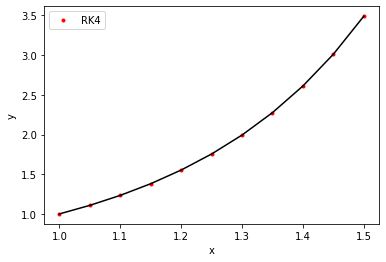

In [10]:
import numpy as np 
import math
import matplotlib.pyplot as plt

# Condición inicial f(x0) = y0
x0 = float(input('Ingrese el valor inicial x_0: ')) 
print(' ')
y0 = float(input('Ingrese el valor inicial y_0: '))
y00 = y0
print(' ')

# Valor x_final y tamaño de paso h:
xf = float(input('Ingrese el valor final x_f: '))
print(' ')
h = float(input('Ingrese el tamaño de paso h: '))

# este valor lo usamos para gregar un 
# índice más al array de valores en x:
vf_xi = h/10 

# Número de iteraciones
n = (xf - x0)/(h)
print(' ')
print('Total de iteraciones: ', n)

# Array de valores en x, array de valores a iterar
x = np.arange(start=x0, stop=xf+vf_xi, step=h)

xi = x[1:]

# Definimos la función dy/dx = f(x,y):
def f(x,y):
    # Aquí colocamos la expresión de la función f(x, y):
    return 2*x*y

# Ecuaciones del modelo RK4
ycalc = []
for i in x:
    # Ecuaciones de k1, k2, k3, k4:
    k1 = h * f(i, y00)
    k2 = h * f(i + 0.5 * h, y00 + 0.5 * k1)
    k3 = h * f(i + 0.5 * h, y00 + 0.5 * k2)
    k4 = h * f(i + h, y00 + k3)
 
    # Definimos la ecuación RK4, donde el valor resultante es el 
    # nuevo valor de entrada de y para la siguiente iteración:
    y_i = y00 + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    
    y00 = y_i
    
    ycalc.append(y00)

# Con esta instrucción eliminamos el último valor calculado
# de y, este corresponde al valor de x siguiente del rango:
ind_f = len(ycalc) -1

# Agregamos y0 a los valores calculados
y_calc = [y0] + ycalc[0:ind_f]
#print(' ')
#print('Los valores de y son: ', y_calc)

# Printamos los valores x,y:
print(' ')
print('x_n, y_n')
for i, j in list(zip(x, y_calc)):
    #se printan los valores:(xi, yi) 
    print("%.2f %.4f" %   (i, j))

print('--------------------')
print('Solución por método RK4:')

# Graficamos los datos x,y:
plt.plot(x, y_calc, '.', color="red") 
plt.plot(x, y_calc, color="black") 
plt.legend(['RK4'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

--------------------
Solución exacta:


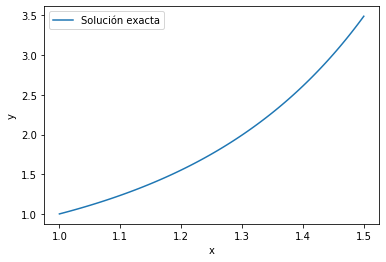

In [6]:
# Función exacta:
xex = np.linspace(x0,xf,101)
c = .3678794412
y_exacta = c * (np.exp(pow(xex,2)))

print('--------------------')
print('Solución exacta:')
plt.plot(xex, y_exacta)
plt.legend(['Solución exacta'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

--------------------
Solución exacta VS RK4:


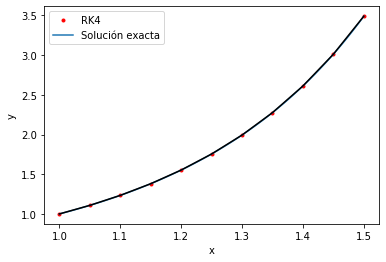

In [11]:
# Función exacta:
xex = np.linspace(x0,xf,101)
c = .3678794412
y_exacta = c * (np.exp(pow(xex,2)))

print('--------------------')
print('Solución exacta VS RK4:')
plt.plot(x, y_calc, '.', color="red") 
plt.plot(xex,y_exacta)
plt.plot(x, y_calc, color="black") 
plt.legend(['RK4', 'Solución exacta'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
# ------------------------------- Cálculo del error:
y_real = y_exacta[-1]

e_abs = abs(y_real - y_calc[-1])

e_rel = e_abs / abs(y_real)

p_e_rel = e_rel * 100

print(' ')
print('Valor real en y(4):', y_real)
print(' ')
print('Valor aproximado en y(4):', y_calc[-1])
print(' ')
print('Error absoluto: ', e_abs)
print(' ')
print('Error relativo: ', e_rel)
print(' ')
print('Porcentaje del error relativo: ', p_e_rel)

 
Valor real en y(4): 3.490342957732789
 
Valor aproximado en y(4): 3.454427083333333
 
Error absoluto:  0.035915874399456094
 
Error relativo:  0.010290070298073474
 
Porcentaje del error relativo:  1.0290070298073475


In [12]:
# ------------------------------- Cálculo del error:
y_real = y_exacta[-1]

e_abs = abs(y_real - y_calc[-1])

e_rel = e_abs / abs(y_real)

p_e_rel = e_rel * 100

print(' ')
print('Valor real en y(4):', y_real)
print(' ')
print('Valor aproximado en y(4):', y_calc[-1])
print(' ')
print('Error absoluto: ', e_abs)
print(' ')
print('Error relativo: ', e_rel)
print(' ')
print('Porcentaje del error relativo: ', p_e_rel)

 
Valor real en y(4): 3.490342957732789
 
Valor aproximado en y(4): 3.490333819700948
 
Error absoluto:  9.138031840993932e-06
 
Error relativo:  2.618089956102679e-06
 
Porcentaje del error relativo:  0.0002618089956102679
